In [1]:
import numpy as np
import random

from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
## 2d,

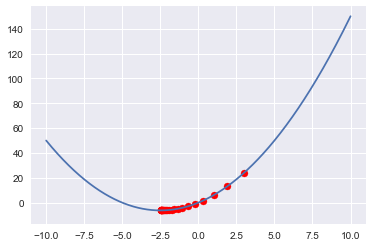

min: -2.4792215874753736


In [3]:
def pp_plt(cost, thetas=None):

    x = np.linspace(-10, 10, 100*10*2)
    y = [ cost(i) for i in x ]

    plt.plot(x, y)
    
    if not thetas == None:
        
        for theta in thetas:
            plt.scatter(theta, cost(theta), color='r')
    
    plt.show()

theta = 3
learning_rate = .1

cost = lambda x: 5*x + x**2
derivative = lambda x: 5 + 2*(x**1)

history = [ theta ]
for iteration in range(25):
    theta = theta - ( learning_rate * derivative(theta) )
    history.append(theta)

pp_plt(cost, history)
print('min:', theta)

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
## 3d,

In [6]:
def pp_plt3(history):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    x1 = np.linspace(-10, 10, 100*10)
    x2 = np.linspace(-10, 10, 100*10)

    X, Y = np.meshgrid(x1, x2)
    Z = X**2 + Y**2
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    
    Xs = np.matrix(history)[:,0].T.tolist()[0]
    Ys = np.matrix(history)[:,1].T.tolist()[0]
    ax.scatter3D(Xs, Ys, [np.array(Xs)**2 + np.array(Ys)**2])

In [7]:
theta = np.array([ -10, -10 ])
y = np.sum(np.square(theta))

theta, y

(array([-10, -10]), 200)

In [8]:
theta = np.array([ -10, -10 ])
y = np.sum(np.square(theta))

theta, y

learning_rate = .01
cost = lambda X: np.sum(np.square(X))

derivative_x1 = lambda X: 2*X[0] + 0
derivative_x2 = lambda X: 0 + 2*X[1]

history = [ theta ]
for iteration in range(10000):
    
    derivatives = np.array([
        learning_rate * derivative_x1(theta),
        learning_rate * derivative_x2(theta)
    ])
    
    theta = theta - derivatives 
    history.append(theta)

min: [-1.82287515e-87 -1.82287515e-87]


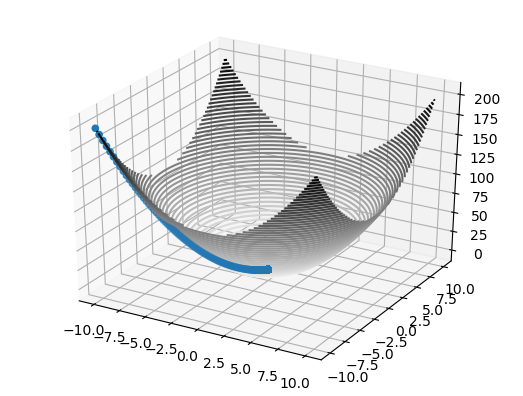

In [9]:
sns.reset_orig()

pp_plt3(
    np.matrix(history))
print('min:', theta)

In [10]:
# y = mx + b

# 1/m sum ( y - ( mx + b ) )^2

## partial by m = 2/m * (y - (mx + b) ) * -x
## partial by b = 2/m * (y - (mx + b) ) * -1

def cost (m, b, X, y):
    return np.mean( np.square( y - (m*X + b) ) )

In [11]:
def pp_plt(X, y, b, m, iteration):
    
    _ = plt.title(iteration)
    _ = plt.scatter(X, y)
    
    # regression stats,
    _ = plt.plot(X, X*m_gradient + b_gradient, color='r')
    
    plt.show()
    
    ## print stats,
    print('m:', m_gradient, 'b:', b_gradient, 'cost:', cost(m, b, X, y))

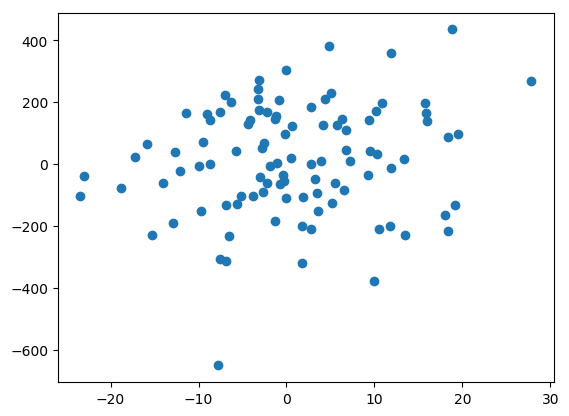

In [12]:
X, y = datasets.make_regression()
X = np.sum(X, axis=1)

plt.scatter(X, y)
plt.show()

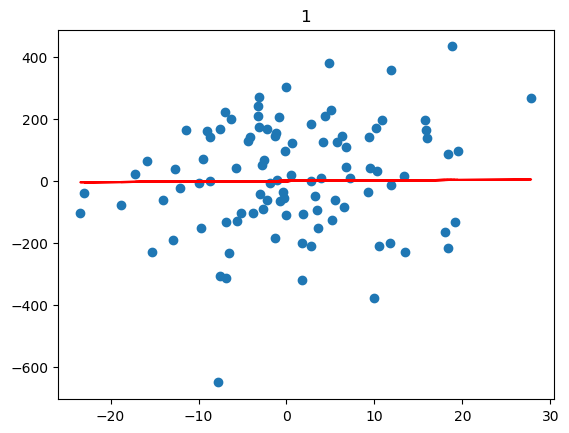

m: 0.1802696888767692 b: 0.019475241487624584 cost: 31691.644530086178


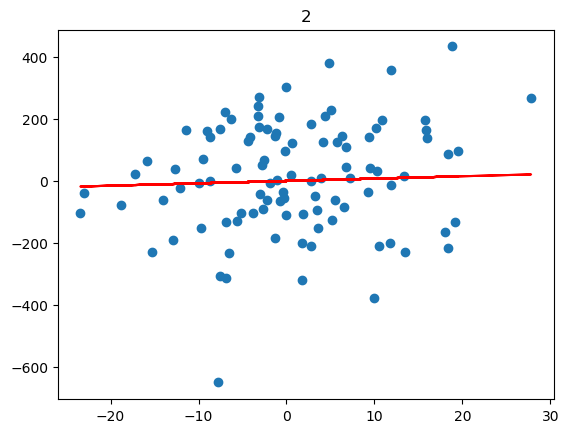

m: 0.7624813622107329 b: 0.04404997598244477 cost: 31385.480305240966


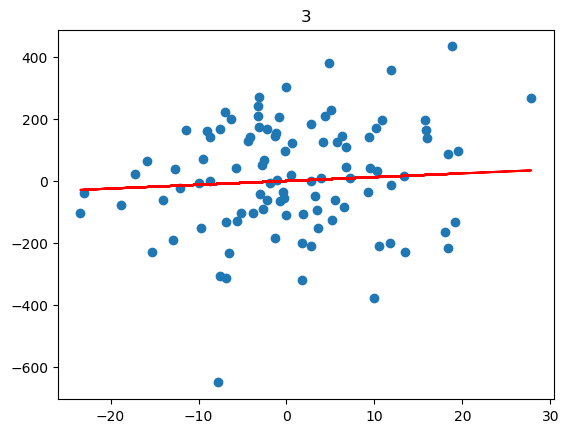

m: 1.2299609885304248 b: 0.06773300131095347 cost: 31187.924862874133


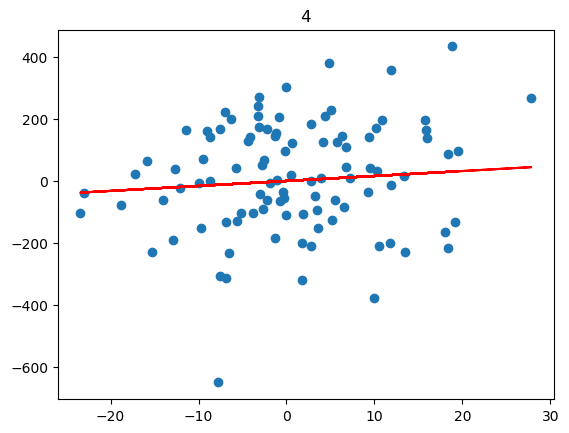

m: 1.6053122259575543 b: 0.09069213775270236 cost: 31060.3998050728


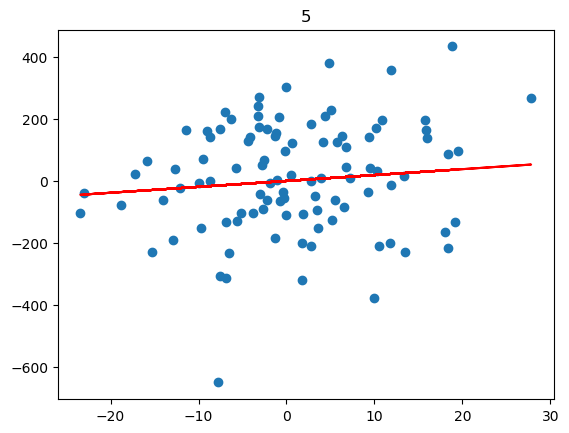

m: 1.9066855386796289 b: 0.11306215859406489 cost: 30978.030180135225


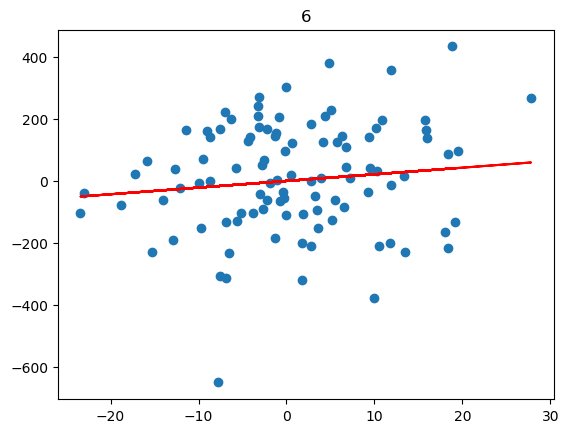

m: 2.1486555299726664 b: 0.13495130075417755 cost: 30924.776875852276


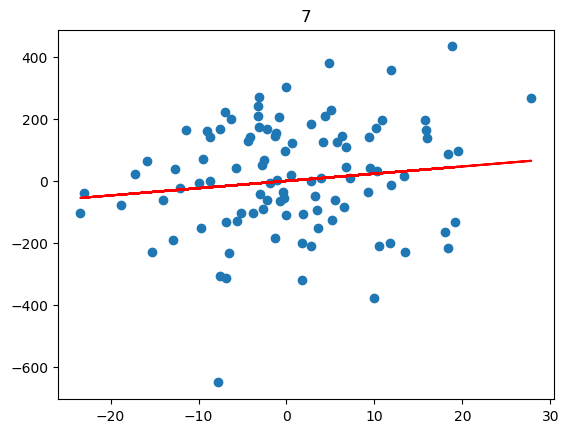

m: 2.3429254300157485 b: 0.1564464927389507 cost: 30890.29803736012


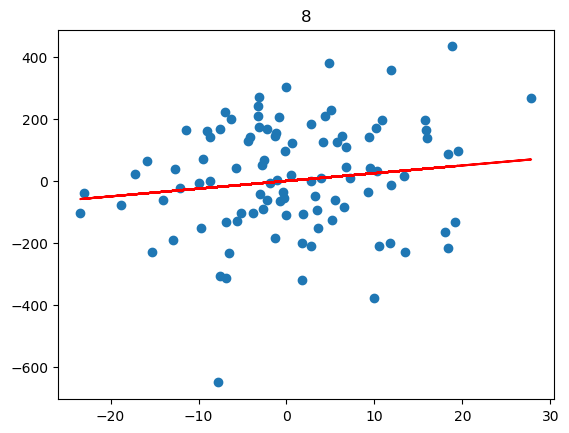

m: 2.4988927910922736 b: 0.1776175526250207 cost: 30867.925342039798


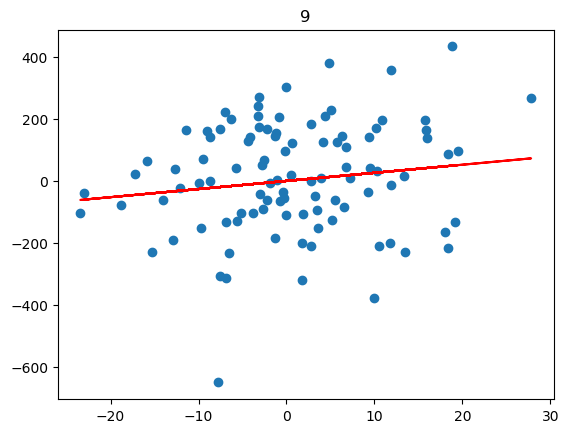

m: 2.6241037340000637 b: 0.19852055899019155 cost: 30853.359122636466


In [13]:
n = len(y)
learning_rate = 0.001

np.random.seed(11)

## initial gradient positions,
m_gradient = np.random.rand() 
b_gradient = np.random.rand()

pp_plt(X, y, b_gradient, m_gradient, 1)
    
for iteration in range(2, 10):

    new_m_gradient = 0
    new_b_gradient = 0

    for i in range(n):
        x_i = X[i]
        y_i = y[i]

        y_hat = m_gradient*x_i + b_gradient
        new_m_gradient +=  ( (2/n) * (y_i - y_hat) * (-1) * x_i )
        new_b_gradient +=  ( (2/n) * (y_i - y_hat) * (-1) )

    b_gradient = b_gradient - (learning_rate * new_b_gradient)
    m_gradient = m_gradient - (learning_rate * new_m_gradient)
    
    pp_plt(X, y, b_gradient, m_gradient, iteration)
    
    